# Email Spam Detection

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r"C:\Users\admin\Downloads\archive (16)\emails.csv")

In [3]:
data.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [4]:
data.shape

(5172, 3002)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


In [6]:
data

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,Email 5168,2,2,2,3,0,0,32,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,Email 5169,35,27,11,2,6,5,151,4,3,...,0,0,0,0,0,0,0,1,0,0
5169,Email 5170,0,0,1,1,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,1
5170,Email 5171,2,7,1,0,2,1,28,2,0,...,0,0,0,0,0,0,0,1,0,1


In [7]:
data = data.drop(columns = 'Email No.')

In [9]:
# Separate features and target
X = data.drop(columns=['Prediction'])  # Assuming 'Prediction' is your target column
y = data['Prediction']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
# Build the ANN model
model = Sequential()
model.add(Dense(units=128, activation='relu', input_dim=X_train.shape[1]))  # Input layer
model.add(Dense(units=64, activation='relu'))  # Hidden layer
model.add(Dense(units=32, activation='relu'))  # Hidden layer
model.add(Dense(units=1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=0)

# Train the model and save the history for plotting
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, verbose=0)

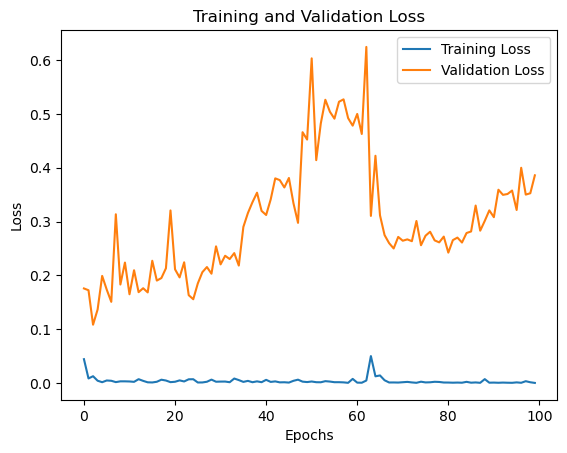

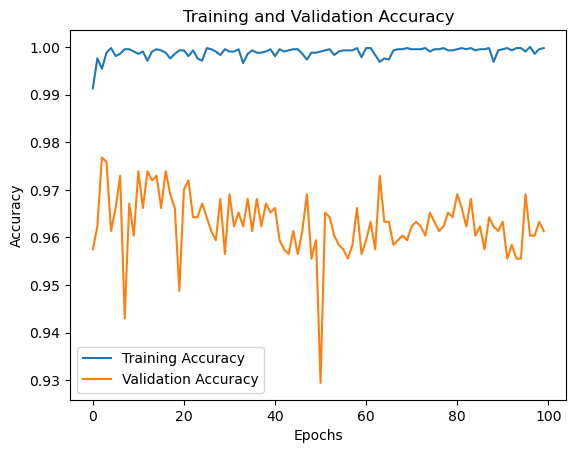

In [12]:
# Plotting training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [13]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy}")

33/33 [==============================] - 0s 4ms/step - loss: 0.3859 - accuracy: 0.9614
Test Accuracy: 0.9613526463508606


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train and evaluate a Logistic Regression model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Calculate evaluation metrics
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Accuracy (Logistic Regression): {accuracy_lr}")
print("Classification Report (Logistic Regression):\n", classification_report(y_test, y_pred_lr))
print("Confusion Matrix (Logistic Regression):\n", confusion_matrix(y_test, y_pred_lr))

Accuracy (Logistic Regression): 0.970048309178744
Classification Report (Logistic Regression):
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       739
           1       0.93      0.97      0.95       296

    accuracy                           0.97      1035
   macro avg       0.96      0.97      0.96      1035
weighted avg       0.97      0.97      0.97      1035

Confusion Matrix (Logistic Regression):
 [[716  23]
 [  8 288]]


C:\Users\admin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
from sklearn.svm import SVC

# Train and evaluate an SVC model
svc_model = SVC(kernel='linear')
svc_model.fit(X_train, y_train)
y_pred_svc = svc_model.predict(X_test)

# Calculate evaluation metrics
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print(f"Accuracy (SVC): {accuracy_svc}")
print("Classification Report (SVC):\n", classification_report(y_test, y_pred_svc))
print("Confusion Matrix (SVC):\n", confusion_matrix(y_test, y_pred_svc))

Accuracy (SVC): 0.9468599033816425
Classification Report (SVC):
               precision    recall  f1-score   support

           0       0.97      0.96      0.96       739
           1       0.90      0.92      0.91       296

    accuracy                           0.95      1035
   macro avg       0.93      0.94      0.94      1035
weighted avg       0.95      0.95      0.95      1035

Confusion Matrix (SVC):
 [[707  32]
 [ 23 273]]


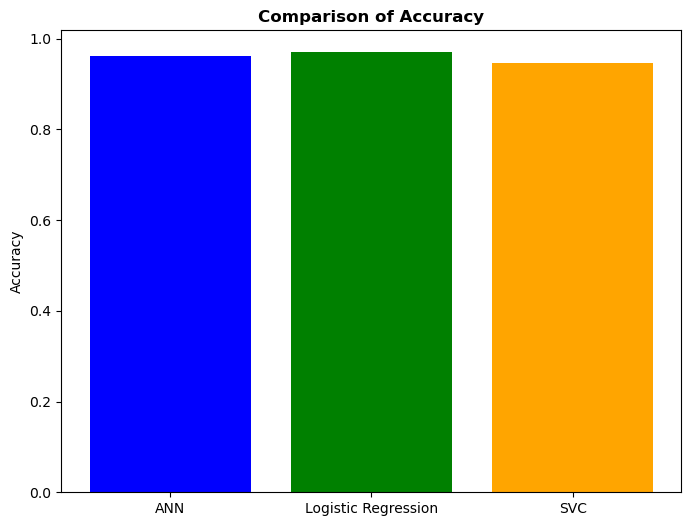

In [16]:
# Data for plotting
models = ['ANN', 'Logistic Regression', 'SVC']
accuracies = [accuracy, accuracy_lr, accuracy_svc]

# Plotting accuracy
plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'orange'])
plt.title('Comparison of Accuracy', weight='bold')
plt.ylabel('Accuracy')
plt.show()

In [17]:
# Selecting a single email from the test set (example: first email in X_test)
X_single = X_test[0].reshape(1, -1)  # Reshape is important to match the model's expected input shape

# Predict the probability of the email being spam
y_pred_single_prob = model.predict(X_single)

# Convert probability to binary label (0 or 1)
is_spam = (y_pred_single_prob > 0.5).astype("int32")

if is_spam == 1:
    print("The email is predicted to be SPAM.")
else:
    print("The email is predicted to be NOT SPAM.")

1/1 [==============================] - 0s 283ms/step
The email is predicted to be NOT SPAM.
